# Hbond Network

In [1]:
import networkx as nx
import mdtraj as md
import pandas as pd
import numpy as np
import MDAnalysis as mda
import MDAnalysis.analysis.hbonds as hbonds
import matplotlib
import matplotlib.pyplot as plt
import ast
import csv
import warnings
warnings.filterwarnings('ignore')

In [2]:
traj_notess = [['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3'],['5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3'],['5NJY_I233T_pH70_md4',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3'],['5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3'],['5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3'],['5NJY_F238L_pH46_md1',
                 '5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3'],['5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3'],['5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3'],['4HFI_pH46_md1','4HFI_pH46_md2','4HFI_pH46_md3'],['4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3'],['4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3'],['4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3'],['4NPQ_pH70_md5','4NPQ_pH70_md6','4NPQ_pH70_md7'],['4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5'],['4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5'],['4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5']]

In [3]:
traj_notes = ['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3','5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3','5NJY_I233T_pH70_md4',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3','5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3','5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3','5NJY_F238L_pH46_md1',
                 '5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3','5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3','5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3','4HFI_pH46_md1','4HFI_pH46_md2','4HFI_pH46_md3','4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3','4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3','4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3','4NPQ_pH70_md5','4NPQ_pH70_md6','4NPQ_pH70_md7','4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5','4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5','4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5']

In [4]:
def create_hbond_contact_map(traj_note, location = '/media/scottzhuang/data/MD/', skip=10):
    top_location = traj_note + '/' + traj_note + ".ca.pdb"
    traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
    traj = md.load(location + traj_location,top = location + top_location)
    n_frames = traj.n_frames
    hbond_contact_map = pd.DataFrame(columns=['residue1','residue2','interaction'])
    hbond_network_dataframe = pd.read_csv(location + traj_note + '/hbond_network.csv')
    for column in hbond_network_dataframe.columns:
        if (column !=  'traj_time') & (column != 'residue') & (column != 'Unnamed: 0'):
            residue1s = hbond_network_dataframe.loc[(hbond_network_dataframe[column] != 0)]['residue'].values
            residue2 = int(column)
            for residue1 in set(residue1s):
                if hbond_contact_map[(hbond_contact_map.residue1 == residue1) & (hbond_contact_map.residue2 == residue2)].empty:
                    interaction_sum = hbond_network_dataframe[(hbond_network_dataframe[column] != 0) & (hbond_network_dataframe.residue == residue1)].shape[0]
                    hbond_contact_map = pd.concat([hbond_contact_map,pd.DataFrame([[residue1,residue2,interaction_sum / n_frames]],columns=['residue1','residue2','interaction'])],ignore_index=True)
                else:
                    interaction_sum = hbond_network_dataframe[(hbond_network_dataframe[column] != 0) & (hbond_network_dataframe.residue == residue1)].shape[0]
                    hbond_contact_map.loc[(hbond_contact_map.residue1 == residue1) & (hbond_contact_map.residue2 == residue2),'interaction'] += interaction_sum / n_frames
    print(hbond_contact_map)
    hbond_contact_map.to_csv(location + traj_note + '/hbond_contact_map.csv')

In [5]:
def gather_replicates(traj_notes,location = '/media/scottzhuang/data/MD/'):
    pearson_avg = []
    for traj_note in traj_notes:
        contact_map = pd.read_csv(location + traj_note + '/hbond_contact_map_complete.csv')
        pearson_avg.append(contact_map['hbond'].values)
    contact_map['hbond'] = np.mean(pearson_avg,axis=0)
    return contact_map

In [6]:
def plot_hbond_map(data,ax,note):
    data[data.hbond >= 0.5].plot(kind='scatter',x='residue1',y='residue2',c='hbond',colormap='autumn',ax=ax)
    ax.set_title(note + ' Hbond & Water Bridge Map (lifetime > 0.5)')
    plt.show()

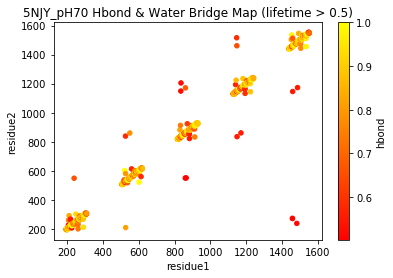

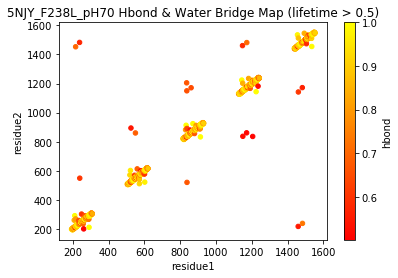

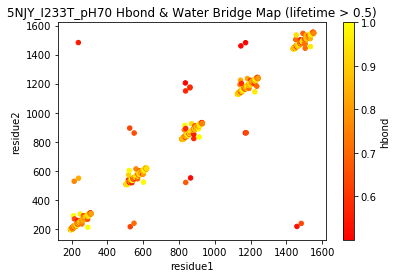

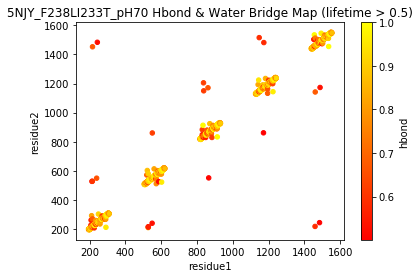

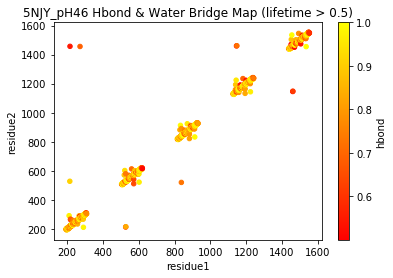

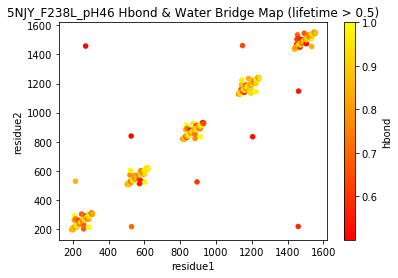

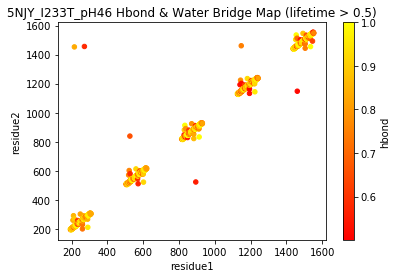

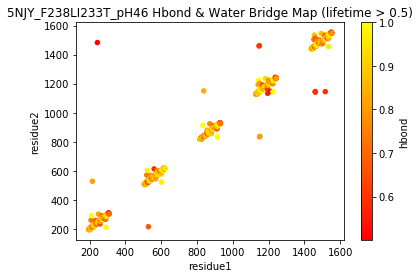

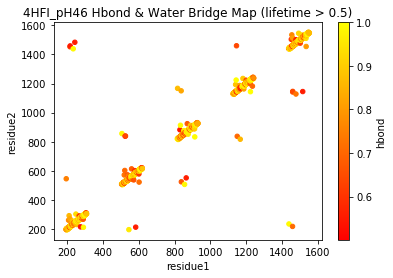

KeyboardInterrupt: 

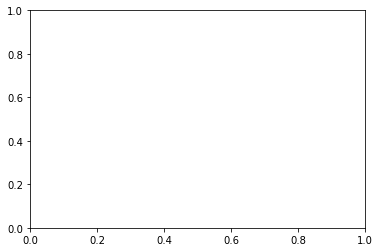

In [220]:
for traj_notes in traj_notess:
    ax = plt.subplot()
    plot_hbond_map(gather_replicates(traj_notes),ax,traj_notes[0][:-4])

In [221]:
def plot_intra_hbond_map(data,note,ax):
    data1 = data[(data.residue1 <= 311) & (data.residue2 <= 311)]
    data2 = data[(data.residue1 > 311) & (data.residue1 <= 311 *2) &(data.residue2 > 311) & (data.residue2 <= 311 *2)]
    data3 = data[(data.residue1 > 311 *2) & (data.residue1 <= 311 *3) &(data.residue2 > 311 *2) & (data.residue2 <= 311 *3)]
    data4 = data[(data.residue1 > 311 *3) & (data.residue1 <= 311 *4) &(data.residue2 > 311 *3) & (data.residue2 <= 311 *4)]
    data5 = data[(data.residue1 > 311 *4) & (data.residue1 <= 311 *5) &(data.residue2 > 311 *4) & (data.residue2 <= 311 *5)]
    data2.residue1 = data1.residue1.values
    data2.residue2 = data1.residue2.values
    data3.residue1 = data1.residue1.values
    data3.residue2 = data1.residue2.values   
    data4.residue1 = data1.residue1.values
    data4.residue2 = data1.residue2.values   
    data5.residue1 = data1.residue1.values
    data5.residue2 = data1.residue2.values   
    data1 = data1[data1['hbond'] >= 0.1].reset_index()
    data2 = data2[data2['hbond'] >= 0.1].reset_index()
    data3 = data3[data3['hbond'] >= 0.1].reset_index()
    data4 = data4[data4['hbond'] >= 0.1].reset_index()
    data5 = data5[data5['hbond'] >= 0.1].reset_index()
    data_intra = pd.DataFrame(columns=['residue1','residue2','hbond'])
    for pair in np.array(list(set([tuple(t) for t in pd.concat([data1,data2,data3,data4,data5])[['residue1','residue2']].values]))):
        data_intra = pd.concat([data_intra,pd.DataFrame([[int(pair[0]) + 5,int(pair[1]) + 5,
#                           np.mean([data1[(data1.residue1 == pair[0]) & (data1.residue2 == pair[1])]['hbond'].values,
#                                   data2[(data2.residue1 == pair[0]) & (data2.residue2 == pair[1])]['hbond'].values,
#                                   data3[(data3.residue1 == pair[0]) & (data3.residue2 == pair[1])]['hbond'].values,
#                                   data4[(data4.residue1 == pair[0]) & (data4.residue2 == pair[1])]['hbond'].values,
#                                   data5[(data5.residue1 == pair[0]) & (data5.residue2 == pair[1])]['hbond'].values])]],
                            np.sum(np.sum([data1.loc[(data1.residue1 == pair[0]) & (data1.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data2.loc[(data2.residue1 == pair[0]) & (data2.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data3.loc[(data3.residue1 == pair[0]) & (data3.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data4.loc[(data4.residue1 == pair[0]) & (data4.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data5.loc[(data5.residue1 == pair[0]) & (data5.residue2 == pair[1]),'hbond'].values.tolist()]))/5]], 
                                                          columns=['residue1','residue2','hbond']
                                  )],ignore_index=True)
    data_intra = data_intra.convert_objects(convert_numeric=True)
    data_intra.plot(kind='scatter',x='residue1',y='residue2',c=data_intra.hbond,colormap='Greens',ax=ax,colorbar=False,vmax=1,vmin=0)
    ax.set_xlim(198,315)
    ax.set_ylim(198,315)
    data_intra.to_csv('conan_interaction/' + note + '_intra_hbond_new.csv')

In [222]:
def plot_inter_hbond_map(data,note,ax):
    data1 = data[(data.residue1 > 311 * 0) & (data.residue1 <= 311 * 1) &(data.residue2 > 311 * 1) & (data.residue2 <= 311 *2)]
    data2 = data[(data.residue1 > 311 * 1) & (data.residue1 <= 311 * 2) &(data.residue2 > 311 * 2) & (data.residue2 <= 311 *3)]
    data3 = data[(data.residue1 > 311 * 2) & (data.residue1 <= 311 * 3) &(data.residue2 > 311 * 3) & (data.residue2 <= 311 *4)]
    data4 = data[(data.residue1 > 311 * 3) & (data.residue1 <= 311 * 4) &(data.residue2 > 311 * 4) & (data.residue2 <= 311 *5)]
    data5 = data[(data.residue1 > 311 * 4) & (data.residue1 <= 311 * 5) &(data.residue2 > 311 * 0) & (data.residue2 <= 311 * 1)]
    data2.residue1 = data1.residue1.values
    data2.residue2 = data1.residue2.values
    data3.residue1 = data1.residue1.values
    data3.residue2 = data1.residue2.values   
    data4.residue1 = data1.residue1.values
    data4.residue2 = data1.residue2.values   
    data5.residue1 = data1.residue1.values
    data5.residue2 = data1.residue2.values   
    data1 = data1[data1['hbond'] >= 0.1].reset_index()
    data2 = data2[data2['hbond'] >= 0.1].reset_index()
    data3 = data3[data3['hbond'] >= 0.1].reset_index()
    data4 = data4[data4['hbond'] >= 0.1].reset_index()
    data5 = data5[data5['hbond'] >= 0.1].reset_index()
    data_inter = pd.DataFrame(columns=['residue1','residue2','hbond'])
    for pair in np.array(list(set([tuple(t) for t in pd.concat([data1,data2,data3,data4,data5])[['residue1','residue2']].values]))):
                            
        data_inter = pd.concat([data_inter,pd.DataFrame([[int(pair[0]) + 5,int(pair[1]-311) + 5,
                                                        np.sum(np.sum([data1.loc[(data1.residue1 == pair[0]) & (data1.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data2.loc[(data2.residue1 == pair[0]) & (data2.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data3.loc[(data3.residue1 == pair[0]) & (data3.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data4.loc[(data4.residue1 == pair[0]) & (data4.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data5.loc[(data5.residue1 == pair[0]) & (data5.residue2 == pair[1]),'hbond'].values.tolist()]))/5 
                                                         ]]
                                                        ,columns=['residue1','residue2','hbond'])
                                                         ],ignore_index=True)
    data_inter = data_inter.convert_objects(convert_numeric=True)
    data_inter.plot(kind='scatter',x='residue1',y='residue2',c='hbond',colormap='Greens',ax=ax,colorbar=True,vmax=1,vmin=0)
    ax.set_xlim(198,315)
    ax.set_ylim(198,315)
    data_inter.to_csv('conan_interaction/' + note + '_inter_hbond_new.csv')

In [223]:
def plot_inter_intra_hbond(traj_notes):
    fig = plt.figure() 
    ax1 = fig.add_subplot(1,2,1,aspect='equal') 
    ax2 = fig.add_subplot(1,2,2,aspect='equal') 
    plot_intra_hbond_map(gather_replicates(traj_notes),traj_notes[0][:-4],ax1)
    plot_inter_hbond_map(gather_replicates(traj_notes),traj_notes[0][:-4],ax2)
    plt.suptitle(traj_notes[0][:-4])
    plt.tight_layout()
    plt.show()

In [224]:
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()
Parallel(n_jobs=num_cores)(delayed(plot_inter_intra_hbond)(traj_notes) for traj_notes in traj_notess)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [225]:
def plot_interaction_difference(note1,note2,note3):
    fig = plt.figure() 
    ax1 = fig.add_subplot(1,2,1,aspect='equal') 
    ax2 = fig.add_subplot(1,2,2,aspect='equal') 
    #ax3 = fig.add_subplot(1,3,3) 
    plot_inter_interaction_difference(note1,note2,note3,ax1)
    plot_intra_interaction_difference(note1,note2,note3,ax2)
    #plt3 = plot_salt_bridge_interaction(data,ax3)

    ax1.set_xlim(198,315)
    ax1.set_ylim(198,315)
    ax2.set_xlim(198,315)
    ax2.set_ylim(198,315)    
    ax1.set_title('inter interaction')
    ax2.set_title('intra interaction')
    plt.suptitle(note1 + ' vs ' + note2 + ' of ' + note3)
    plt.tight_layout()
    plt.show()

In [236]:
def plot_inter_interaction_difference(note1,note2,note3,ax):
    difference = 0.4

    interaction_dataframe1 = pd.read_csv('conan_interaction/' + note1 + '_inter_hbond_new.csv')
    interaction_dataframe2 = pd.read_csv('conan_interaction/' + note2 + '_inter_hbond_new.csv')
    for residues in (interaction_dataframe2[['residue1','residue2']].values):
        if not(interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])].empty):
            interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'] = (interaction_dataframe2[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1])]['hbond'].values - interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])]['hbond'].values)[0]
        if ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) >= difference) & (residues[0] > 150) & (residues[1] > 150):
            print('inter: ' + str(note2) + ' of ' + str(residues))
        elif ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) <= -difference) & (residues[0] > 150) & (residues[1] > 150):
            print('inter: ' + str(note1) + ' of ' + str(residues))
    for residues in (interaction_dataframe1[['residue1','residue2']].values):
        if interaction_dataframe2[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1])].empty:
            interaction_dataframe1.loc[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1]),'hbond'] = - (interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])]['hbond'])
            interaction_dataframe2 = interaction_dataframe2.append(interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])],ignore_index = True)
        if ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) >= difference) & (residues[0] > 150) & (residues[1] > 150):
            print('inter: ' + str(note2) + ' of ' + str(residues))
        elif ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) <= -difference) & (residues[0] > 150) & (residues[1] > 150):
            print('inter: ' + str(note1) + ' of ' + str(residues))
    interaction_dataframe2.plot(kind='scatter',x='residue1',y='residue2',c=interaction_dataframe2.hbond,colormap='PuOr',ax=ax,colorbar=False,vmin=-1, vmax=1)


In [237]:
def plot_intra_interaction_difference(note1,note2,note3,ax):
    difference = 0.4
    interaction_dataframe1 = pd.read_csv('conan_interaction/' + note1 + '_intra_hbond_new.csv')
    interaction_dataframe2 = pd.read_csv('conan_interaction/' + note2 + '_intra_hbond_new.csv')
    for residues in (interaction_dataframe2[['residue1','residue2']].values):
        if not(interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])].empty):
            interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'] = (interaction_dataframe2[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1])]['hbond'].values - interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])]['hbond'].values)[0]
        if ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) >= difference) & (residues[0] > 150) & (residues[1] > 150):
            print('intra: ' + str(note2) + ' of ' + str(residues))
        elif ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) <= -difference) & (residues[0] > 150) & (residues[1] > 150):
            print('intra: ' + str(note1) + ' of ' + str(residues))
    for residues in (interaction_dataframe1[['residue1','residue2']].values):
        if interaction_dataframe2[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1])].empty:
            interaction_dataframe1.loc[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1]),'hbond'] = - (interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])]['hbond'])
            interaction_dataframe2 = interaction_dataframe2.append(interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])],ignore_index = True)
        if ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) >= difference) & (residues[0] > 150) & (residues[1] > 150):
            print('intra: ' + str(note2) + ' of ' + str(residues))
        elif ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) <= -difference) & (residues[0] > 150) & (residues[1] > 150):
            print('intra: ' + str(note1) + ' of ' + str(residues))
    interaction_dataframe2.plot(kind='scatter',x='residue1',y='residue2',c=interaction_dataframe2.hbond,colormap='PuOr',ax=ax,colorbar=False,vmin=-1, vmax=1)


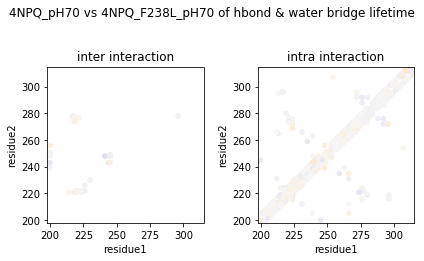

In [238]:
plot_interaction_difference('4NPQ_pH70','4NPQ_F238L_pH70','hbond & water bridge lifetime')

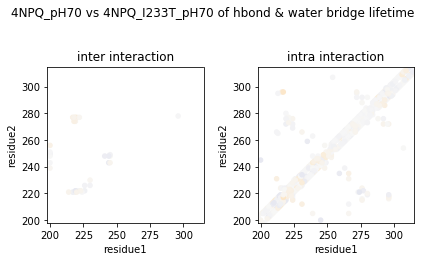

In [239]:
plot_interaction_difference('4NPQ_pH70','4NPQ_I233T_pH70','hbond & water bridge lifetime')

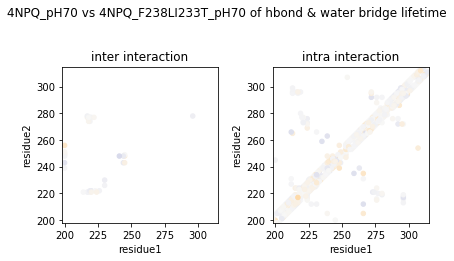

In [240]:
plot_interaction_difference('4NPQ_pH70','4NPQ_F238LI233T_pH70','hbond & water bridge lifetime')

intra: 4HFI_pH46 of [237 241]
intra: 4HFI_pH46 of [241 237]
intra: 4HFI_F238L_pH46 of [237 233]
intra: 4HFI_F238L_pH46 of [233 237]
intra: 4HFI_pH46 of [237 241]
intra: 4HFI_pH46 of [241 237]
intra: 4HFI_F238L_pH46 of [237 233]
intra: 4HFI_F238L_pH46 of [233 237]


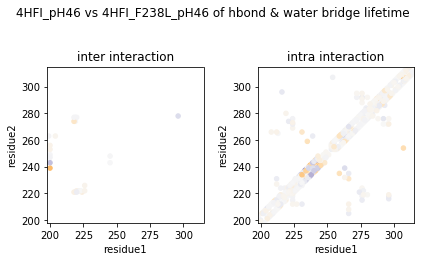

In [241]:
plot_interaction_difference('4HFI_pH46','4HFI_F238L_pH46','hbond & water bridge lifetime')

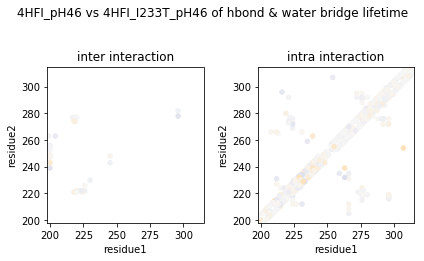

In [242]:
plot_interaction_difference('4HFI_pH46','4HFI_I233T_pH46','hbond & water bridge lifetime')

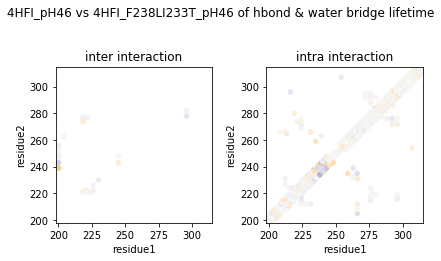

In [243]:
plot_interaction_difference('4HFI_pH46','4HFI_F238LI233T_pH46','hbond & water bridge lifetime')

inter: 4HFI_pH46 of [200 239]
inter: 4HFI_pH46 of [200 239]
intra: 4NPQ_pH70 of [266 212]
intra: 4NPQ_pH70 of [234 238]
intra: 4HFI_pH46 of [277 277]
intra: 4NPQ_pH70 of [237 233]
intra: 4HFI_pH46 of [213 265]
intra: 4HFI_pH46 of [241 245]
intra: 4NPQ_pH70 of [233 237]
intra: 4NPQ_pH70 of [212 266]
intra: 4HFI_pH46 of [235 259]
intra: 4HFI_pH46 of [213 213]
intra: 4NPQ_pH70 of [243 248]
intra: 4NPQ_pH70 of [217 296]
intra: 4NPQ_pH70 of [263 239]
intra: 4NPQ_pH70 of [238 234]
intra: 4NPQ_pH70 of [217 217]
intra: 4HFI_pH46 of [259 235]
intra: 4HFI_pH46 of [237 234]
intra: 4HFI_pH46 of [234 231]
intra: 4NPQ_pH70 of [266 212]
intra: 4NPQ_pH70 of [234 238]
intra: 4HFI_pH46 of [277 277]
intra: 4NPQ_pH70 of [237 233]
intra: 4HFI_pH46 of [213 265]
intra: 4HFI_pH46 of [241 245]
intra: 4NPQ_pH70 of [233 237]
intra: 4NPQ_pH70 of [212 266]
intra: 4HFI_pH46 of [235 259]
intra: 4HFI_pH46 of [234 237]
intra: 4HFI_pH46 of [213 213]
intra: 4NPQ_pH70 of [243 248]
intra: 4NPQ_pH70 of [263 239]
intra: 4NP

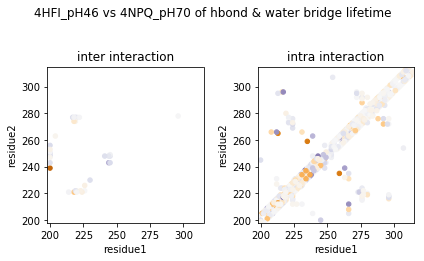

In [244]:
plot_interaction_difference('4HFI_pH46','4NPQ_pH70','hbond & water bridge lifetime')

In [245]:
# Build a decision function by interaction differernce of open and closed states

In [60]:
hbond_4NPQ_WT_list_inter_pair = pd.read_csv('conan_interaction/' + '4NPQ_pH70' + '_inter_hbond_new.csv')[['residue1','residue2']].values
hbond_4NPQ_WT_list_intra_pair = pd.read_csv('conan_interaction/' + '4NPQ_pH70' + '_intra_hbond_new.csv')[['residue1','residue2']].values

hbond_5NJY_WT_list_inter_pair = pd.read_csv('conan_interaction/' + '4NPQ_pH70' + '_inter_hbond_new.csv')[['residue1','residue2']].values
hbond_5NJY_WT_list_intra_pair = pd.read_csv('conan_interaction/' + '4NPQ_pH70' + '_intra_hbond_new.csv')[['residue1','residue2']].values

# Hbond Network

In [6]:
trans_ind = np.asarray([np.arange(193,311),np.arange(504,622),np.arange(815,933),np.arange(1126,1244),np.arange(1437,1555)]).flatten()

In [7]:
# Helix coordinate
# Polar Coordinate to Cartesian Coordinate

In [60]:
r = [1,2,3]
theta2 = np.asarray([0,-1,-2,-3,-4]) * 2 * np.pi / 5
theta1 = theta2 - np.pi / 7
theta3 = theta2 + np.pi / 7
theta4 = np.asarray([0,-1,-2,-3,-4]) * 2 * np.pi / 5

In [61]:
h2 = np.asarray([r[0] * np.cos(theta2),r[0] * np.sin(theta2)]).T
h4 = np.asarray([r[2] * np.cos(theta4),r[2] * np.sin(theta4)]).T
h3 = np.asarray([r[1] * np.cos(theta3),r[1] * np.sin(theta3)]).T
h1 = np.asarray([r[1] * np.cos(theta1),r[1] * np.sin(theta1)]).T

In [62]:
helix_1_ind = [np.arange(198,220) + 311 * 0 - 5,np.arange(198,220) + 311 * 1 - 5,np.arange(198,220) + 311 * 2 - 5,np.arange(198,220) + 311 * 3 - 5,np.arange(198,220) + 311 * 4 - 5]
helix_2_ind = [np.arange(220,250) + 311 * 0 - 5,np.arange(220,250) + 311 * 1 - 5,np.arange(220,250) + 311 * 2 - 5,np.arange(220,250) + 311 * 3 - 5,np.arange(220,250) + 311 * 4 - 5]
helix_3_ind = [np.arange(250,282) + 311 * 0 - 5,np.arange(250,282) + 311 * 1 - 5,np.arange(250,282) + 311 * 2 - 5,np.arange(250,282) + 311 * 3 - 5,np.arange(250,282) + 311 * 4 - 5]
helix_4_ind = [np.arange(282,316) + 311 * 0 - 5,np.arange(282,316) + 311 * 1 - 5,np.arange(282,316) + 311 * 2 - 5,np.arange(282,316) + 311 * 3 - 5,np.arange(282,316) + 311 * 4 - 5]

In [63]:
pos_helix = dict()
for helix_1_chain, coordinate in zip(helix_1_ind,h1):
    for residue in helix_1_chain:
        pos_helix.update({residue:(coordinate[0],coordinate[1])})
for helix_2_chain, coordinate in zip(helix_2_ind,h2):
    for residue in helix_2_chain:
        pos_helix.update({residue:(coordinate[0],coordinate[1])})
for helix_3_chain, coordinate in zip(helix_3_ind,h3):
    for residue in helix_3_chain:
        pos_helix.update({residue:(coordinate[0],coordinate[1])})
for helix_4_chain, coordinate in zip(helix_4_ind,h4):
    for residue in helix_4_chain:
        pos_helix.update({residue:(coordinate[0],coordinate[1])})

In [65]:
def gather_hbond_replicates(traj_notes,location = '/media/scottzhuang/data/MD/'):
    pearson_avg = []
    for traj_note in traj_notes:
        contact_map = pd.read_csv(location + traj_note + '/hbond_contact_map_complete.csv')
        pearson_avg.append(contact_map['hbond'].values)
    contact_map['hbond'] = np.mean(pearson_avg,axis=0)
    print('In ',traj_notes[0][:-4])
    return contact_map[contact_map['hbond'] >= 0.5],traj_notes[0][:-4]

In [81]:
def create_hbond_network(traj_notes, location = '/media/scottzhuang/data/MD/', skip=10):
    contact_map,note = gather_hbond_replicates(traj_notes)
    Hbond_network = nx.Graph()
    #Hbond_network.add_nodes_from(contact_map.residue1.values.astype(int))
    #Hbond_network.add_nodes_from(contact_map.residue2.values.astype(int))
    Hbond_network.add_nodes_from(np.arange(0,1555))
    pos_spring = nx.spring_layout(Hbond_network)
    pos_circular = nx.circular_layout(Hbond_network)
    #print(Hbond_network.number_of_nodes())
    for index,row in contact_map.iterrows():
        if row['hbond'] >= 0.5:
            Hbond_network.add_edge(row['residue1'],row['residue2'],weight= row['hbond'])


    #print(Hbond_network.number_of_edges())
    Hbond_network = max(nx.connected_component_subgraphs(Hbond_network), key=len)
    resid233 = np.arange(0,5) * 311 + 233 - 5
    resid238 = np.arange(0,5) * 311 + 238 - 5 
    
    plt.subplot(121,aspect='equal')    
    weights = [Hbond_network[u][v]['weight'] * 3 for u,v in Hbond_network.edges]
    options = {'node_color': 'cyan','node_size': 10,'width': weights,'edge_color':weights,'font_size':1,'edge_cmap':plt.cm.Blues,'vmax':1,'vmin':0}
#    options = {'node_color': 'cyan','node_size': 10,'width': 3,'edge_color':'r','font_size':1}
    nx.draw_networkx_edges(Hbond_network,pos_helix, with_labels=False,**options)
    for residue in resid233:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_helix, node_size=20, nodelist=[residue],node_color='red')
    for residue in resid238:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_helix, node_size=20, nodelist=[residue],node_color='green')
    
#    for edge in list(Hbond_network.edges):
#        if (edge[0] in helix_1_ind[1]) & (edge[1] in helix_2_ind[4]):
#            print(edge)
    plt.scatter(h1.T[0],h1.T[1],color='black',alpha=0.5)
    plt.scatter(h2.T[0],h2.T[1],color='black',alpha=0.5)
    plt.scatter(h3.T[0],h3.T[1],color='black',alpha=0.5)
    plt.scatter(h4.T[0],h4.T[1],color='black',alpha=0.5)

    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    circle2 = plt.Circle((0, 0), 2, color='black', fill=False,alpha=0.5)    
    circle3 = plt.Circle((0, 0), 3, color='black', fill=False,alpha=0.5) 
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)
    plt.gca().add_patch(circle3)
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    
    plt.axis('off')

    plt.subplot(122,aspect='equal')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    nx.draw_networkx_edges(Hbond_network,pos_circular, with_labels=False,**options)
#    for edge in list(Hbond_network.edges):
#        if (not(edge[0] in np.asarray(helix_2_ind).flatten())) | (not(edge[1] in np.asarray(helix_2_ind).flatten())):
#            nx.draw_networkx_edges(Hbond_network,pos_circular,edge_color='purple')

    for residue in resid233:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_circular, node_size=20, nodelist=[residue],node_color='red')
    for residue in resid238:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_circular, node_size=20, nodelist=[residue],node_color='green')
    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    plt.gca().add_patch(circle1)
    plt.axis('off')
    plt.savefig('hbond_dat/' + note + '_max_network.pdf')
    plt.show()
    pathlengths = []
    Hbond_network = max(nx.connected_component_subgraphs(Hbond_network), key=len)

    for v in Hbond_network.nodes():
        spl = dict(nx.single_source_shortest_path_length(Hbond_network, v))
        for p in spl:
            pathlengths.append(spl[p])
    
    print('')
    print("average shortest path length %s" % (sum(pathlengths) / len(pathlengths)))
    print('')
#   print("length #paths")
    dist = {}
    for p in pathlengths:
        if p in dist:
            dist[p] += 1
        else:
            dist[p] = 1
    verts = dist.keys()
    #for d in sorted(verts):
    #    print('%s %d' % (d, dist[d]))
    
    print("radius: %d" % nx.radius(Hbond_network))
    print("diameter: %d" % nx.diameter(Hbond_network))
    #print("eccentricity: %s" % nx.eccentricity(Hbond_network))
    print("center: %s" % nx.center(Hbond_network))
    #print("periphery: %s" % nx.periphery(Hbond_network))
    print("density: %s" % nx.density(Hbond_network))
    print(" ")



In  5NJY_pH70


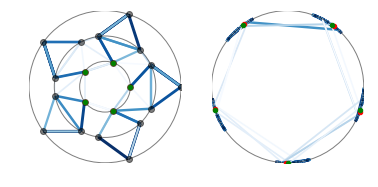


average shortest path length 23.671422438827303

radius: 32
diameter: 64
center: [1476.0]
density: 0.005873194688809286
 
In  5NJY_F238L_pH70


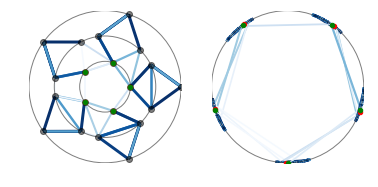


average shortest path length 18.8084612801807

radius: 27
diameter: 53
center: [232.0, 236.0]
density: 0.013136893799877225
 
In  5NJY_I233T_pH70


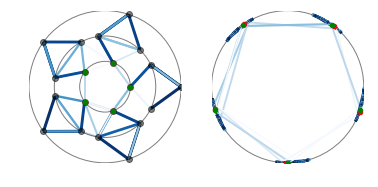


average shortest path length 14.903060018903592

radius: 19
diameter: 38
center: [1168.0]
density: 0.012770254217153719
 
In  5NJY_F238LI233T_pH70


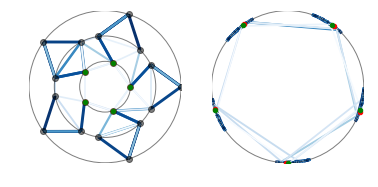


average shortest path length 10.524663923182441

radius: 14
diameter: 28
center: [213.0]
density: 0.017357656163626313
 
In  5NJY_pH46


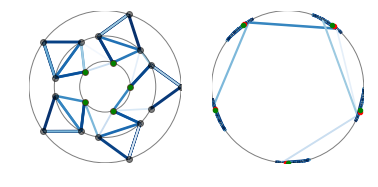


average shortest path length 22.467968914093678

radius: 28
diameter: 55
center: [1471.0, 1475.0]
density: 0.006825075834175936
 
In  5NJY_F238L_pH46


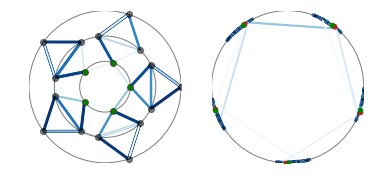


average shortest path length 14.909685902118335

radius: 19
diameter: 37
center: [1201.0, 1205.0]
density: 0.012867215041128085
 
In  5NJY_I233T_pH46


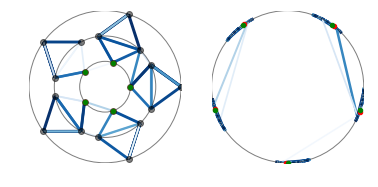


average shortest path length 9.001883656509696

radius: 13
diameter: 24
center: [515.0, 519.0, 569.0]
density: 0.025083986562150055
 
In  5NJY_F238LI233T_pH46


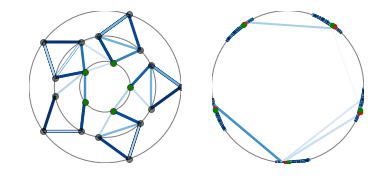


average shortest path length 12.15164058002796

radius: 14
diameter: 28
center: [1143.0]
density: 0.012675668228162029
 
In  4HFI_pH46


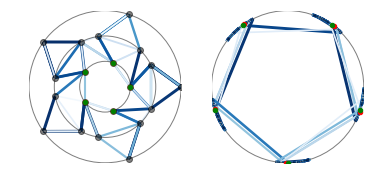


average shortest path length 42.0579453377976

radius: 58
diameter: 115
center: [211.0, 291.0]
density: 0.005226673087148002
 
In  4HFI_F238L_pH46


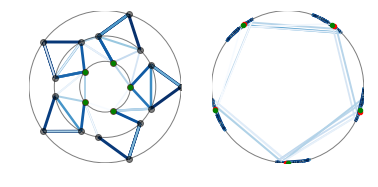


average shortest path length 26.155726573110005

radius: 39
diameter: 78
center: [1512.0]
density: 0.006283687943262411
 
In  4HFI_I233T_pH46


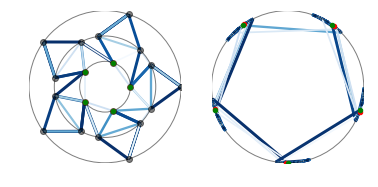


average shortest path length 24.109782691635775

radius: 36
diameter: 54
center: [1143.0]
density: 0.004603584679398959
 
In  4HFI_F238LI233T_pH46


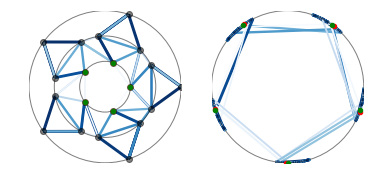


average shortest path length 25.90353774841494

radius: 31
diameter: 62
center: [1154.0]
density: 0.008288548434533836
 
In  4NPQ_pH70


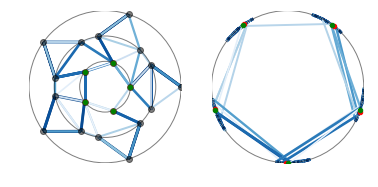


average shortest path length 19.534981201212943

radius: 29
diameter: 52
center: [233.0, 237.0, 1481.0]
density: 0.00498423632751991
 
In  4NPQ_F238L_pH70


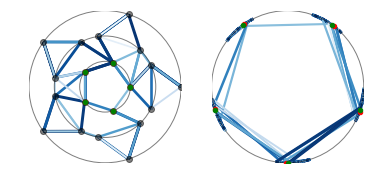


average shortest path length 20.800272392244832

radius: 27
diameter: 49
center: [238.0]
density: 0.004959813025753561
 
In  4NPQ_I233T_pH70


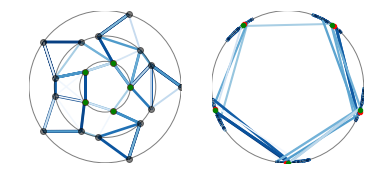


average shortest path length 19.74060433837021

radius: 25
diameter: 46
center: [1160.0]
density: 0.004839230964090111
 
In  4NPQ_F238LI233T_pH70


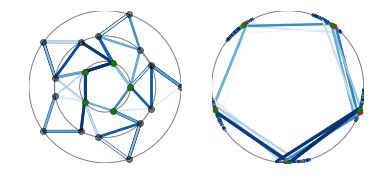


average shortest path length 20.220321180555555

radius: 26
diameter: 49
center: [1160.0]
density: 0.004827766179540709
 


In [80]:
for traj_notes in traj_notess:
    create_hbond_network(traj_notes)

In  5NJY_pH70


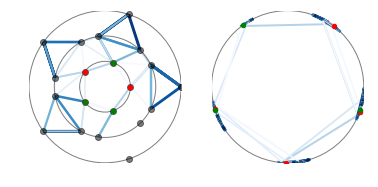


average shortest path length 23.671422438827303

radius: 32
diameter: 64
center: [1476.0]
density: 0.005873194688809286
 
In  5NJY_F238L_pH70


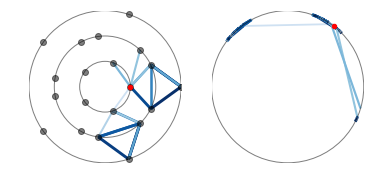


average shortest path length 18.8084612801807

radius: 27
diameter: 53
center: [232.0, 236.0]
density: 0.013136893799877225
 
In  5NJY_I233T_pH70


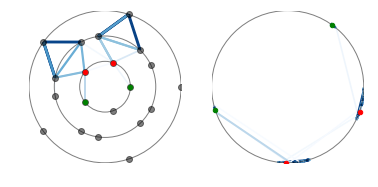


average shortest path length 14.903060018903592

radius: 19
diameter: 38
center: [1168.0]
density: 0.012770254217153719
 
In  5NJY_F238LI233T_pH70


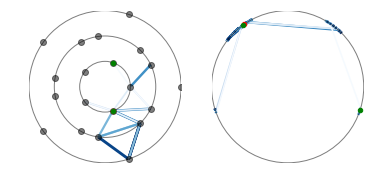


average shortest path length 10.524663923182441

radius: 14
diameter: 28
center: [213.0]
density: 0.017357656163626313
 
In  5NJY_pH46


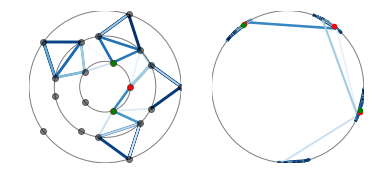


average shortest path length 22.467968914093678

radius: 28
diameter: 55
center: [1471.0, 1475.0]
density: 0.006825075834175936
 
In  5NJY_F238L_pH46


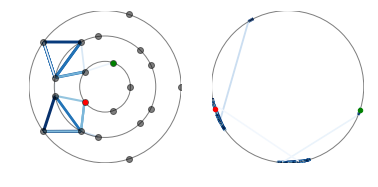


average shortest path length 14.909685902118335

radius: 19
diameter: 37
center: [1201.0, 1205.0]
density: 0.012867215041128085
 
In  5NJY_I233T_pH46


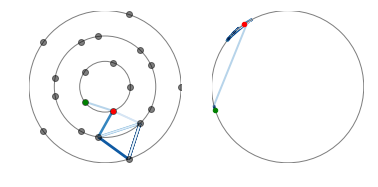


average shortest path length 9.001883656509696

radius: 13
diameter: 24
center: [515.0, 519.0, 569.0]
density: 0.025083986562150055
 
In  5NJY_F238LI233T_pH46


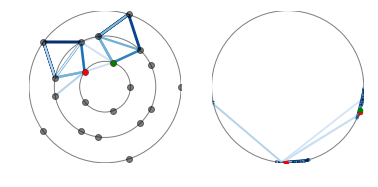


average shortest path length 12.15164058002796

radius: 14
diameter: 28
center: [1143.0]
density: 0.012675668228162029
 
In  4HFI_pH46


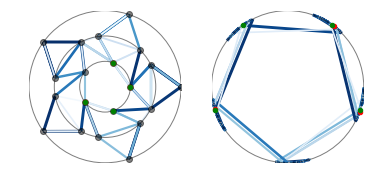


average shortest path length 42.0579453377976

radius: 58
diameter: 115
center: [211.0, 291.0]
density: 0.005226673087148002
 
In  4HFI_F238L_pH46


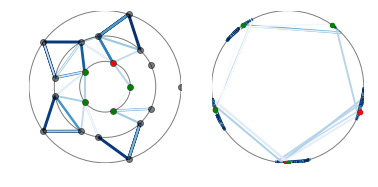


average shortest path length 26.155726573110005

radius: 39
diameter: 78
center: [1512.0]
density: 0.006283687943262411
 
In  4HFI_I233T_pH46


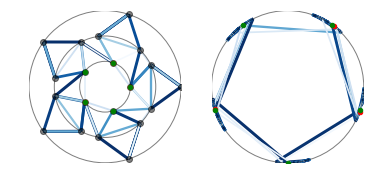


average shortest path length 24.109782691635775

radius: 36
diameter: 54
center: [1143.0]
density: 0.004603584679398959
 
In  4HFI_F238LI233T_pH46


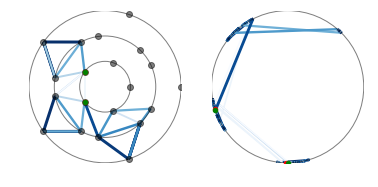


average shortest path length 25.90353774841494

radius: 31
diameter: 62
center: [1154.0]
density: 0.008288548434533836
 
In  4NPQ_pH70


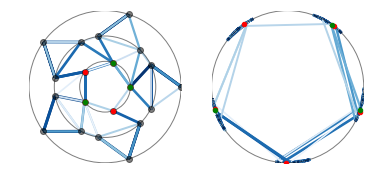


average shortest path length 19.534981201212943

radius: 29
diameter: 52
center: [233.0, 237.0, 1481.0]
density: 0.00498423632751991
 
In  4NPQ_F238L_pH70


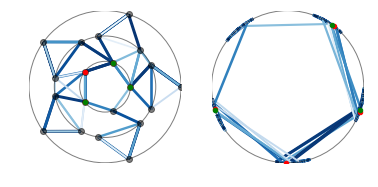


average shortest path length 20.800272392244832

radius: 27
diameter: 49
center: [238.0]
density: 0.004959813025753561
 
In  4NPQ_I233T_pH70


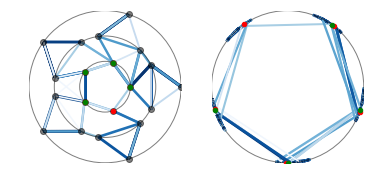


average shortest path length 19.74060433837021

radius: 25
diameter: 46
center: [1160.0]
density: 0.004839230964090111
 
In  4NPQ_F238LI233T_pH70


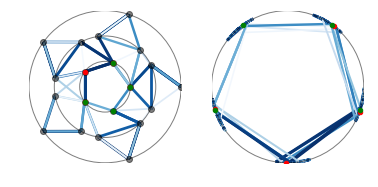


average shortest path length 20.220321180555555

radius: 26
diameter: 49
center: [1160.0]
density: 0.004827766179540709
 


In [82]:
for traj_notes in traj_notess:
    create_hbond_network(traj_notes)

In [212]:
# Transform to Matlab

In [16]:
def transform_hbond_network_data(traj_notes):
    hbond_data_trans =[]
    for traj_note in traj_notes:
        hbond_data = pd.read_csv('/media/scottzhuang/data/MD/' + traj_note + '/hbond_contact_map.csv')
        hbond_data_all = pd.DataFrame(columns=['residue1','residue2','hbond'])
        for ind in trans_ind:
            hbond_data_all = hbond_data_all.append(pd.DataFrame(np.concatenate(([np.zeros([590]) + ind], [trans_ind],[np.zeros([590])]), axis=0).T,columns=['residue1','residue2','hbond']),ignore_index=True)
        for residue1,residue2 in hbond_data[['residue1','residue2']].values:
            hbond_data_all.loc[(hbond_data_all.residue1 == residue1) & (hbond_data_all.residue2 == residue2),'hbond'] = hbond_data[(hbond_data.residue1 == residue1) & (hbond_data.residue2 == residue2)]['interaction'].values 
        hbond_data_all.to_csv('/media/scottzhuang/data/MD/' + traj_note + '/hbond_contact_map_complete.csv')
        hbond_data_trans.append(hbond_data_all['hbond'].values.reshape([590,590]))
    hbond_data_mean = np.mean(hbond_data_trans,axis=0)
    np.savetxt('/media/scottzhuang/data/MD/' + traj_notes[0] + '/' + traj_notes[0][:-4] + '_hbond_network_data_transmembrane_mean.dat',hbond_data_mean)        

In [ ]:
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()
Parallel(n_jobs=num_cores)(delayed(transform_hbond_network_data)(traj_notes) for traj_notes in traj_notess)